# P02_01_EDA

In [43]:
section_fig_main_title = 'P02_01_EDA_'

In [63]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data

the page html file downloaded in Data directory and it is loaded below.

In [51]:
csv_path = "../Data/Data_ICME_scraped.csv"
df = pd.read_csv(csv_path, parse_dates=True)

In [52]:
df.head(2)

,Unnamed: 0,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,0,1996/05/27 1500,1996/05/27 1500,1996/05/29 0300,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1,1996/07/01 1320,1996/07/01 1800,1996/07/02 1100,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN


In [80]:
df = df.drop(columns=['Unnamed: 0'])

In [91]:
df.head(2)

,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996/05/27 1500,1996/05/27 1500,1996/05/29 0300,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996/07/01 1320,1996/07/01 1800,1996/07/02 1100,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN


In [81]:
df.isnull().sum()

Disturbance Y/M/D (UT) (a)                    0
ICME Plasma/Field Start Y/M/D (UT) (b)        0
ICME Plasma/Field End Y/M/D (UT) (b)          0
Comp. Start (Hrs wrt. Plasma/ Field) (c)      0
Comp. End (Hrs wrt. Plasma/ Field) (c)        0
MC Start (Hrs wrt. Plasma/ Field) (d)         0
End (Hrs wrt. Plasma/ Field) (d)              0
BDE? (e)                                      0
BIF? (f)                                      0
Qual. (g)                                     0
dV (km/s) (h)                                 0
V_ICME (km/s) (i)                             0
V_max (km/s) (j)                              0
B (nT) (k)                                    0
MC? (l)                                       0
Dst (nT) (m)                                  0
V_transit (km/s) (n)                          1
LASCO CME Y/M/D (UT) (o)                    235
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 18 columns):
Disturbance Y/M/D (UT) (a)                  513 non-null object
ICME Plasma/Field Start Y/M/D (UT) (b)      513 non-null object
ICME Plasma/Field End Y/M/D (UT) (b)        513 non-null object
Comp. Start (Hrs wrt. Plasma/ Field) (c)    513 non-null object
Comp. End (Hrs wrt. Plasma/ Field) (c)      513 non-null object
MC Start (Hrs wrt. Plasma/ Field) (d)       513 non-null object
End (Hrs wrt. Plasma/ Field) (d)            513 non-null object
BDE? (e)                                    513 non-null object
BIF? (f)                                    513 non-null object
Qual. (g)                                   513 non-null object
dV (km/s) (h)                               513 non-null object
V_ICME (km/s) (i)                           513 non-null int64
V_max (km/s) (j)                            513 non-null int64
B (nT) (k)                                  513 non-null int64
MC

In [83]:
df.describe()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
count,513.000000,513.000000,513.000000
mean,454.405458,524.795322,9.709552
std,103.537467,159.000808,4.325552
min,290.000000,310.000000,2.000000
25%,390.000000,420.000000,7.000000
50%,430.000000,490.000000,9.000000
75%,500.000000,590.000000,12.000000
max,1300.000000,1900.000000,33.000000


In [84]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)', 'ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

In [85]:
cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)', 'V_ICME (km/s) (i)','V_max (km/s) (j)','B (nT) (k)']

numeric_df = df[cols]
numeric_df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
0,1996/05/27 1500,370,400,9
1,1996/07/01 1800,360,370,11
2,1996/08/07 1200,350,380,7
3,1996/12/23 1700,360,420,10
4,1997/01/10 0400,450,460,14


In [86]:
numeric_df.index = numeric_df['ICME Plasma/Field Start Y/M/D (UT) (b)']
numeric_df = numeric_df.drop(['ICME Plasma/Field Start Y/M/D (UT) (b)'], axis=1)
numeric_df.head()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
ICME Plasma/Field Start Y/M/D (UT) (b),,,
1996/05/27 1500,370,400,9
1996/07/01 1800,360,370,11
1996/08/07 1200,350,380,7
1996/12/23 1700,360,420,10
1997/01/10 0400,450,460,14


In [99]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 1996/05/27 1500 to 2021/05/26 2200
Data columns (total 3 columns):
V_ICME (km/s) (i)    513 non-null int64
V_max (km/s) (j)     513 non-null int64
B (nT) (k)           513 non-null int64
dtypes: int64(3)
memory usage: 36.0+ KB


In [87]:
numeric_df.describe()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
count,513.000000,513.000000,513.000000
mean,454.405458,524.795322,9.709552
std,103.537467,159.000808,4.325552
min,290.000000,310.000000,2.000000
25%,390.000000,420.000000,7.000000
50%,430.000000,490.000000,9.000000
75%,500.000000,590.000000,12.000000
max,1300.000000,1900.000000,33.000000


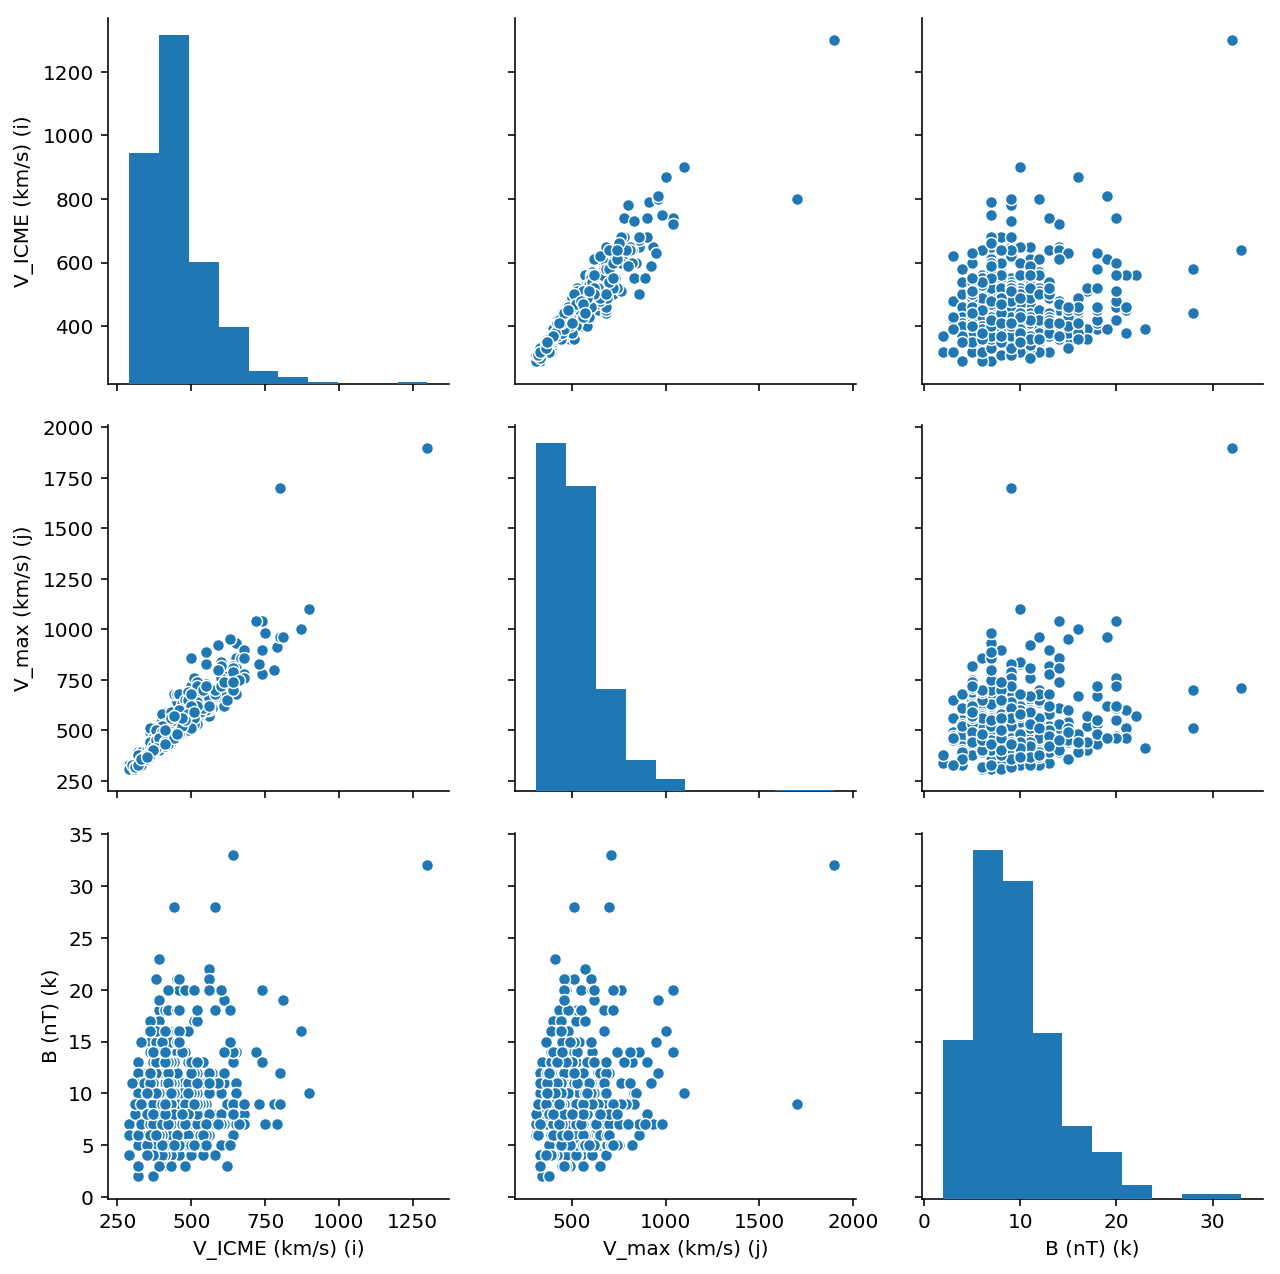

In [94]:
sns.pairplot(numeric_df, height=3)

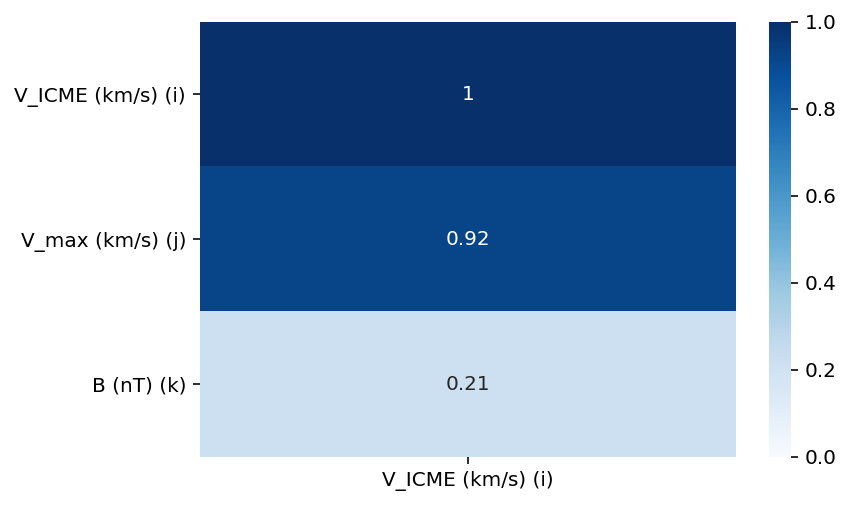

In [88]:
df_corr = numeric_df.corr().abs()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(6,4))
sns.heatmap(df_corr[['V_ICME (km/s) (i)']].sort_values(by=['V_ICME (km/s) (i)'],ascending=False),
            vmin=0,
            cmap='Blues',
            annot=True);
plt.savefig("../Figures/" + section_fig_main_title +"plt1_corr_1.png")
plt.show()

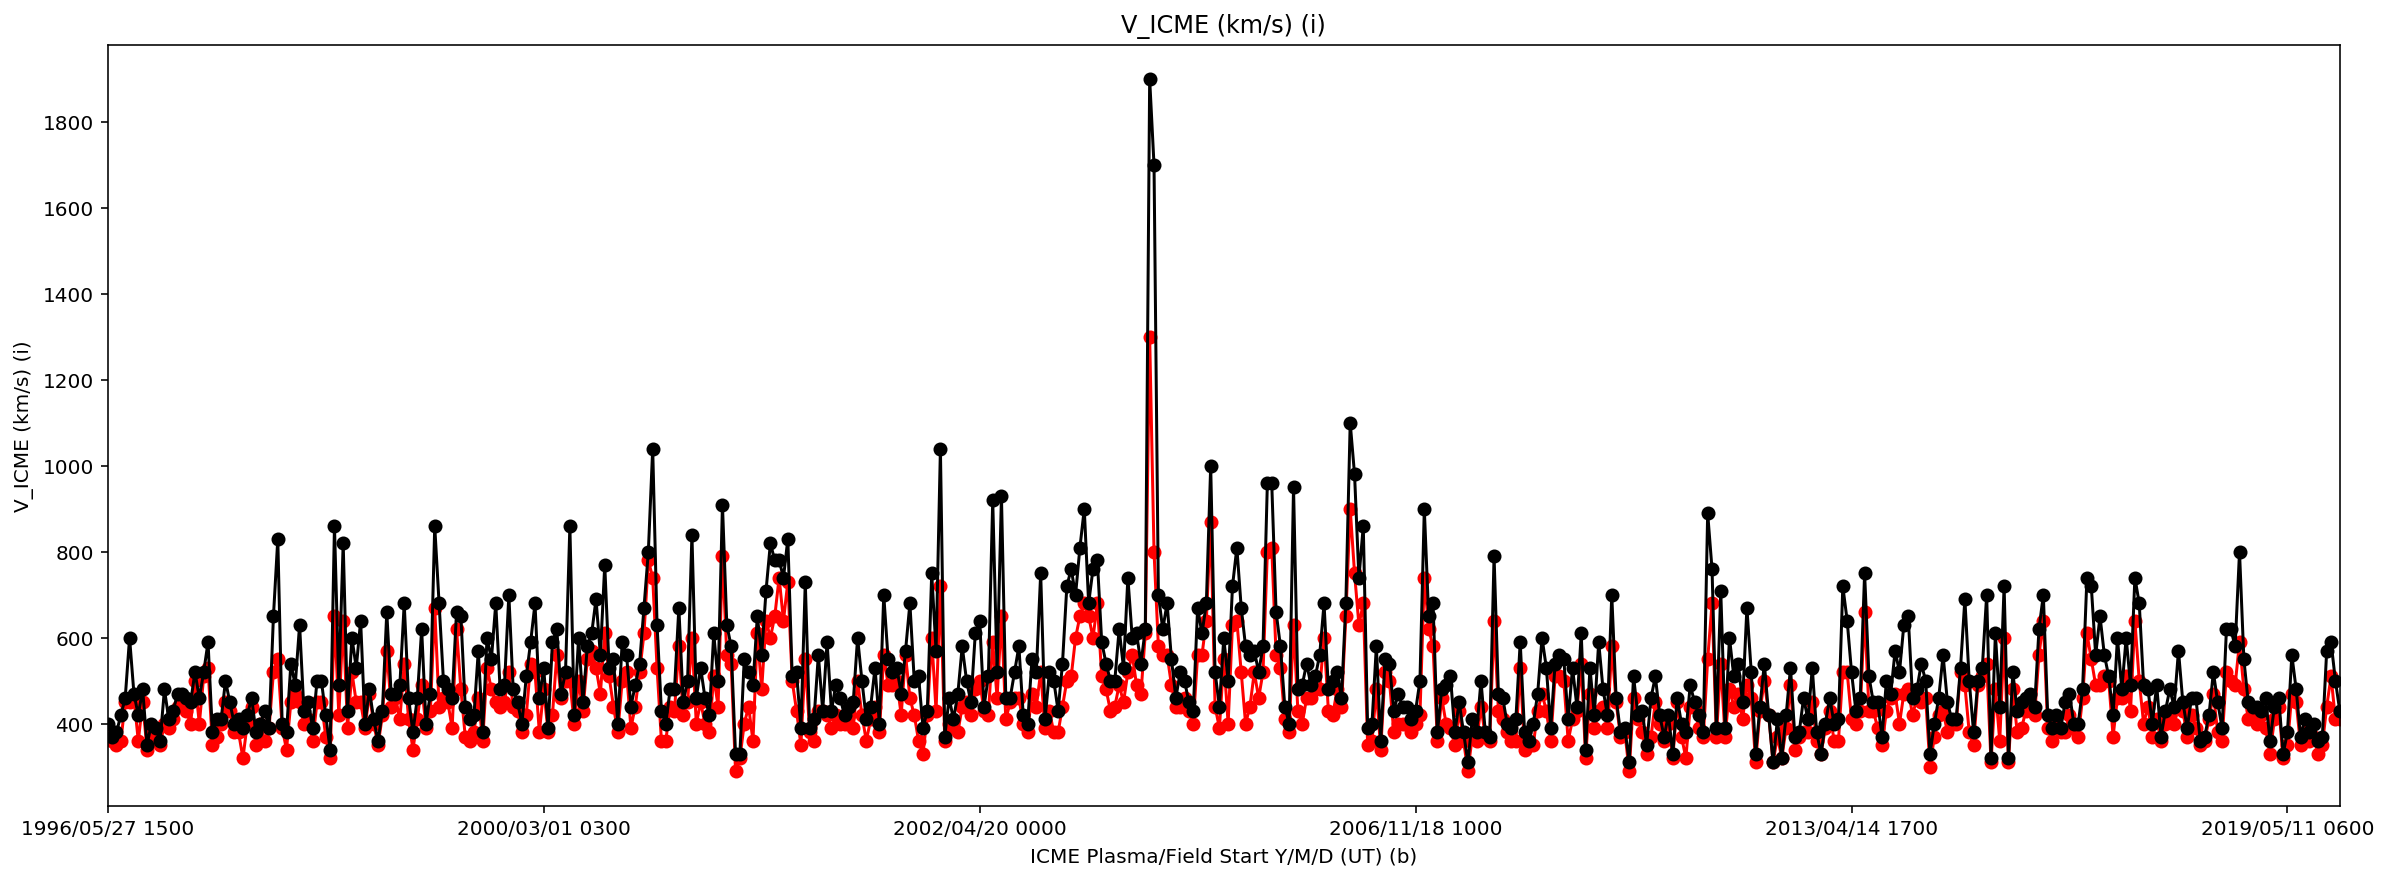

In [89]:
plt.figure(figsize=(20,7))
numeric_df["V_ICME (km/s) (i)"].plot(style="ro-")
numeric_df["V_max (km/s) (j)"].plot(style="ko-")


plt.title("V_ICME (km/s) (i)")
plt.ylabel("V_ICME (km/s) (i)")
plt.savefig("../Figures/" + section_fig_main_title +"plt2.png")

plt.show()

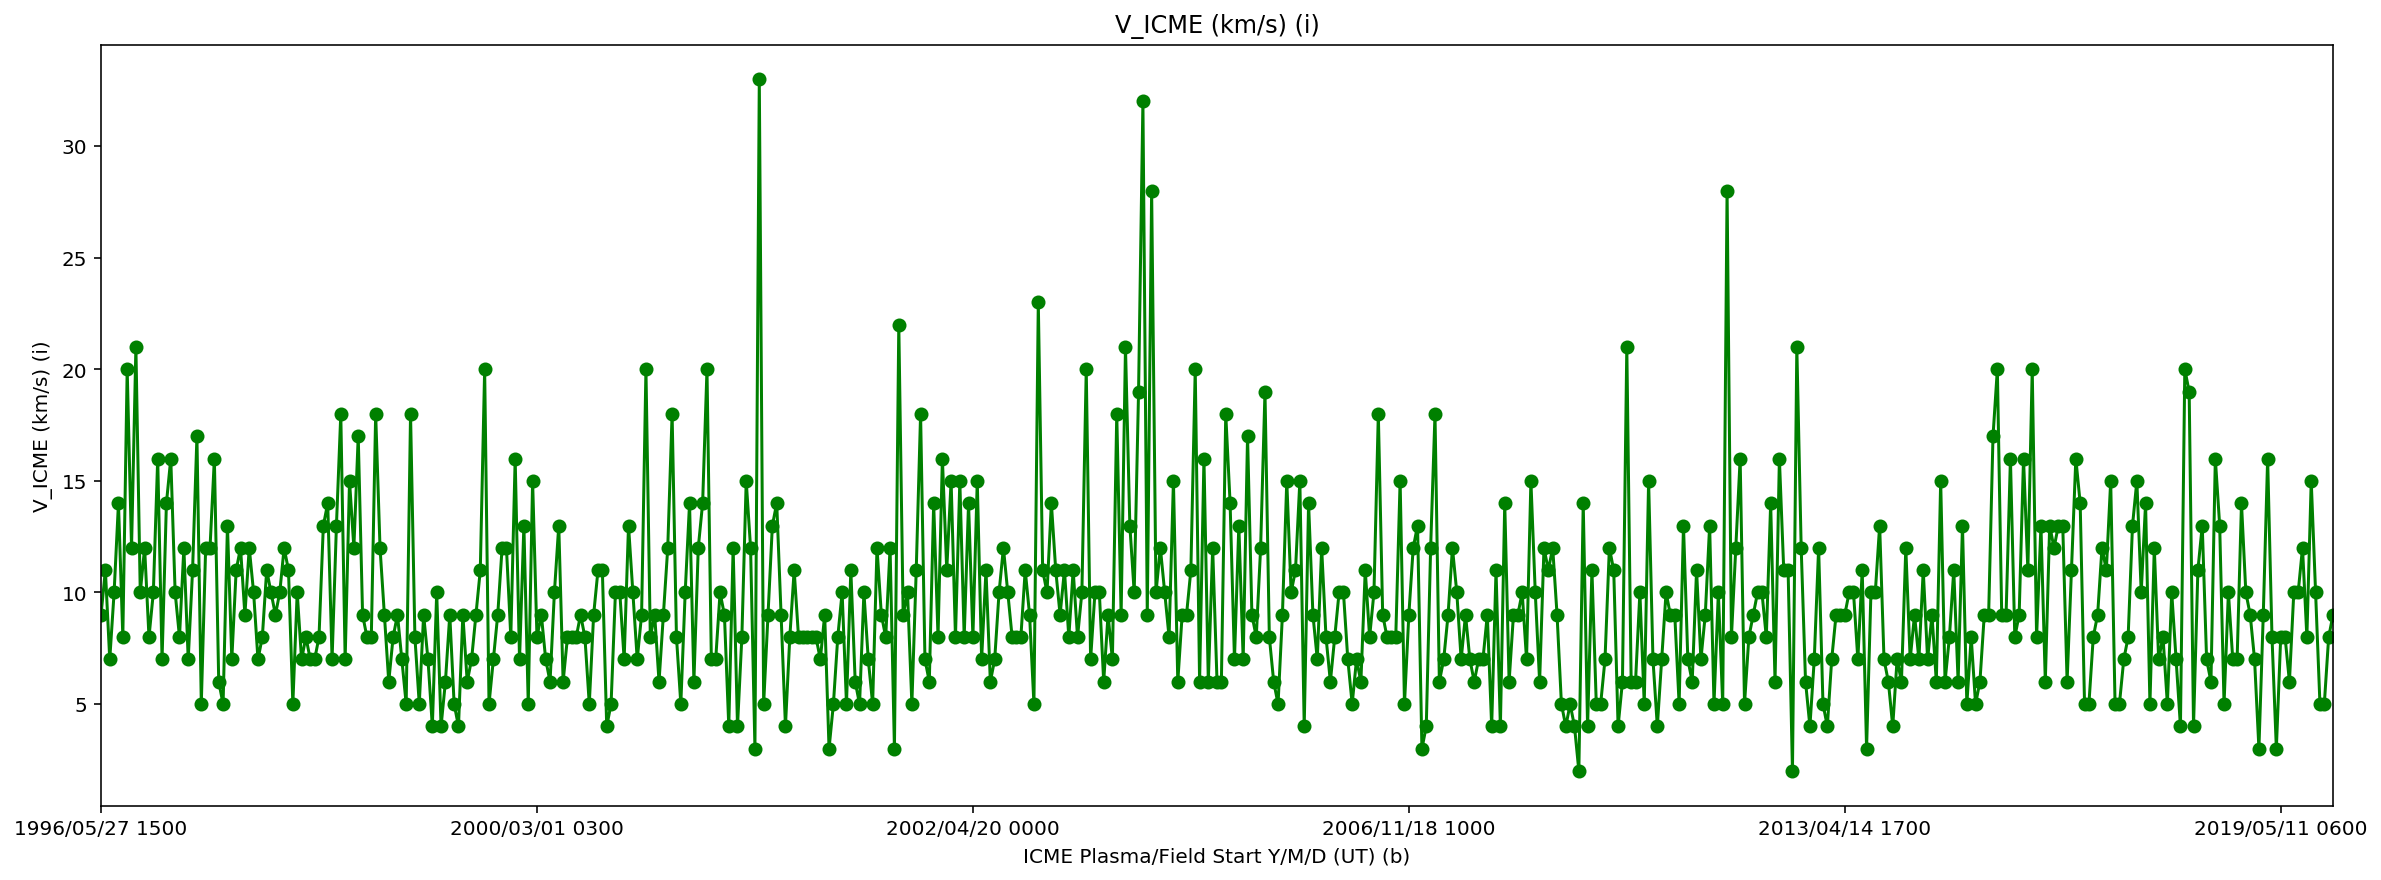

In [90]:
plt.figure(figsize=(20,7))
numeric_df["B (nT) (k)"].plot(style="go-")



plt.title("V_ICME (km/s) (i)")
plt.ylabel("V_ICME (km/s) (i)")
plt.savefig("../Figures/" + section_fig_main_title +"plt3.png")

plt.show()

In [100]:
numeric_df.dtypes

V_ICME (km/s) (i)    int64
V_max (km/s) (j)     int64
B (nT) (k)           int64
dtype: object

In [101]:
lr = LinearRegression()
X = numeric_df[['V_max (km/s) (j)', 'B (nT) (k)']]
y = numeric_df['V_ICME (km/s) (i)']
lr.fit(X, y)
y_pred = lr.predict(X)

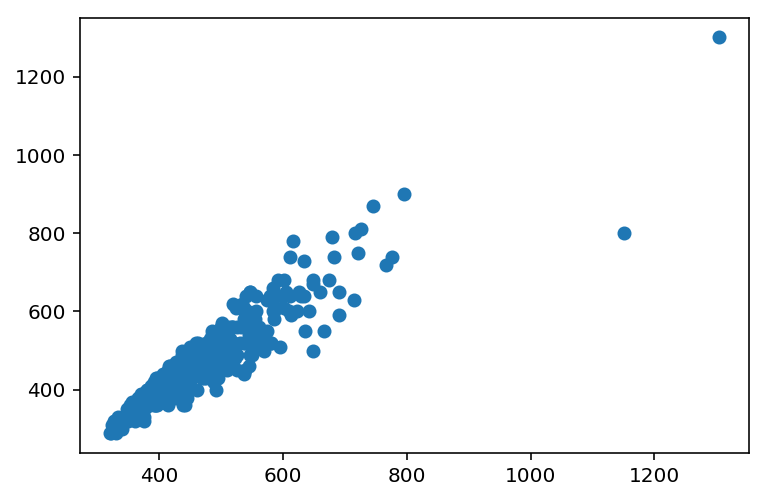

In [102]:
plt.scatter(y_pred, y)

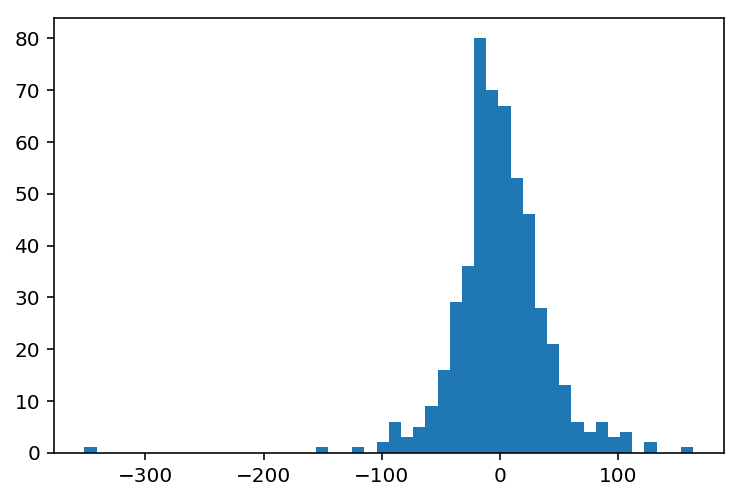

In [103]:

# Creat residuals
resids = y - y_pred
# N assumption:
plt.hist(resids, bins=50);

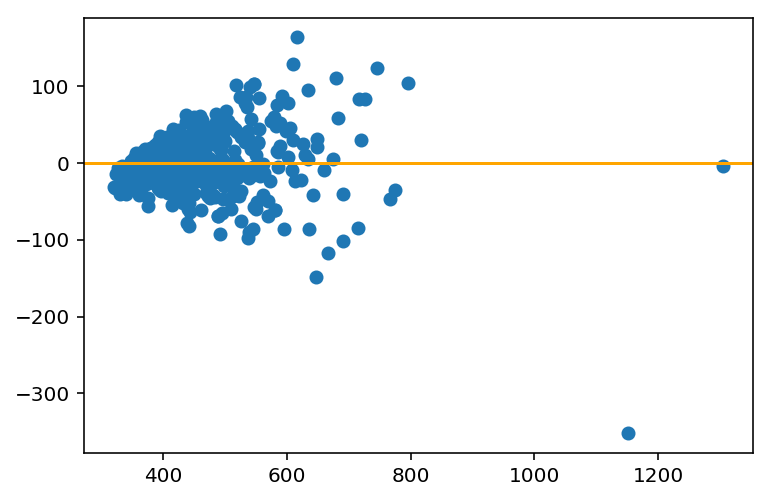

In [104]:

plt.scatter(y_pred, resids)
plt.axhline(0, color='orange');

In [105]:
lr.score(X, y)

0.8542805035800213

In [106]:
metrics.mean_absolute_error(y, y_pred)

27.38569970367237

In [107]:
X_sm = sm.add_constant(X)
ols = sm.OLS(y, X_sm).fit()

ols.summary()

/Users/amin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      V_ICME (km/s) (i)   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1495.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          4.98e-214
Time:                        22:49:36   Log-Likelihood:                -2613.7
No. Observations:                 513   AIC:                             5233.
Df Residuals:                     510   BIC:                             5246.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              128.3067      6.750     19.009      0.000     115.046     141.568
V_max (km/s) (j)     0.5939      0.011     53.230      0.000       0.572       0.616
B (nT) (k)           1.4838      0.410      3.618      0.000       0.678       2.290
==============================================================================
Omnibus:                      188.738   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3624.336
Skew:                          -1.097   Prob(JB):                         0.00
Kurtosis:                      15.835   Cond. No.                     2.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
def plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee):
    ax = plt.gca()
    sub_df = df[fromm:too]
    sub_df.plot(kind="scatter", 
                x=colm_1_name, y=colm_2_name,
                s=sub_df[lab_name]/sizee, 
                label=lab_name, 
                c=sub_df[lab_name], 
                cmap=plt.get_cmap("jet"),
                colorbar=True,
                alpha=0.4, figsize=(10,7), 
                ax = ax
                )

    plt.legend()
    plt.show()
    plt.tight_layout()

In [109]:
numeric_df.columns

Index(['V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)'], dtype='object')

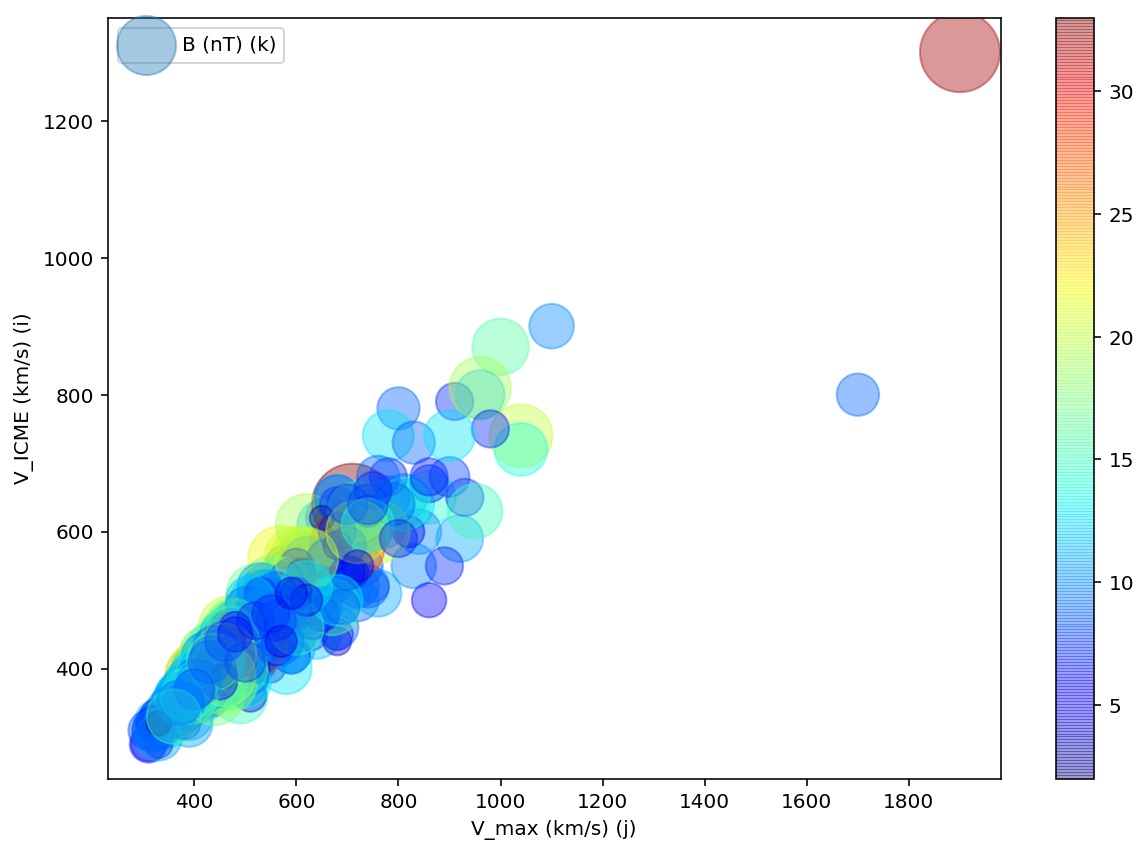

<Figure size 432x288 with 0 Axes>

In [123]:
colm_1_name = 'V_max (km/s) (j)'
colm_2_name = 'V_ICME (km/s) (i)'
lab_name = 'B (nT) (k)'
fromm = 0
too = 513
sizee = 0.02

plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee)
plt.show()

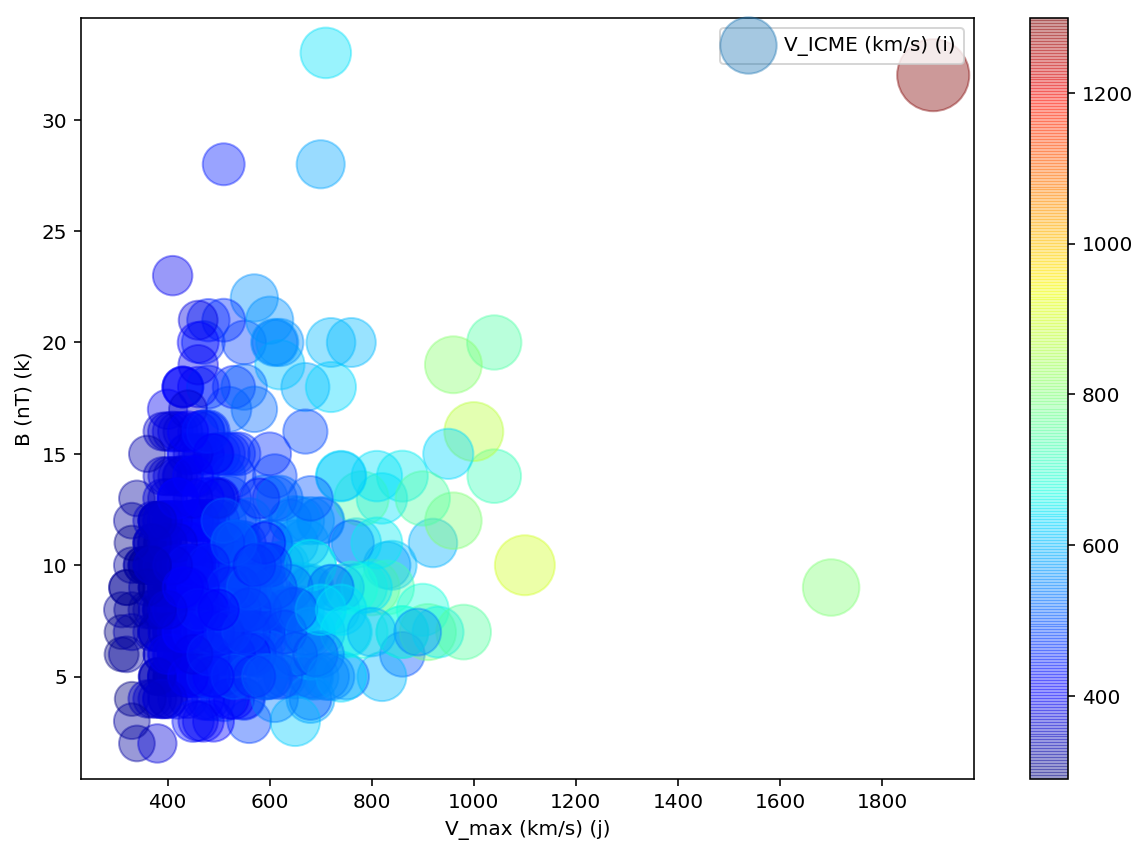

<Figure size 432x288 with 0 Axes>

In [117]:
colm_1_name = 'V_max (km/s) (j)'
colm_2_name = 'B (nT) (k)'
lab_name = 'V_ICME (km/s) (i)'
fromm = 0
too = 513
sizee = 1

plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee)
plt.show()